In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from vector_fields import DavisSkodje, Duffing1D, DoubleGyre
import matplotlib.pyplot as plt
from grid import *
from solves import *
from plots import *
from tools import *
import random
import scipy
import seaborn as sns
from sklearn.decomposition import PCA

In [4]:
N = 120
grid = Duffing_grid(N)
[(x_min, x_max, Nx), (y_min, y_max, Ny)] = grid
t_n = 12
duff_trajs, sol = integrate_ivp(Duffing1D, grid, t_n, max_step=0.01, return_sol=True)
time = sol.t
m = len(time)  // 2
dt = time[m]- time[m-1]
duff_tse = mean_tse(duff_trajs, dt)

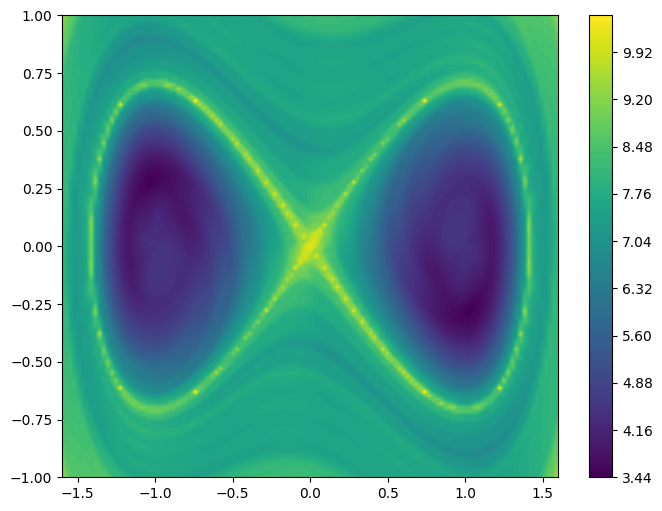

In [5]:
plot_scalar_field(grid, duff_tse)

In [113]:

sub_t = duff_trajs[np.random.choice(duff_trajs.shape[0], 50, replace=False)]
sub_t.shape

sub_t = np.swapaxes(sub_t, 0, -1)
sub_t = np.swapaxes(sub_t, 1, -1)
sub_t = sub_t[::12]
sub_t.shape

(34, 50, 2)

In [114]:
from IPython.display import HTML

def plotter(d):
    plot_scalar_field(grid, duff_tse, show=False, colorbar=False)
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])
    for (x,y) in d:
        plt.scatter(x, y, marker='o', s=60, c='r')

ani = make_plt_ani(plotter, sub_t)

HTML(ani.to_jshtml())


In [ ]:
ani.save("duffing.gif", writer='imagemagick',fps=60)

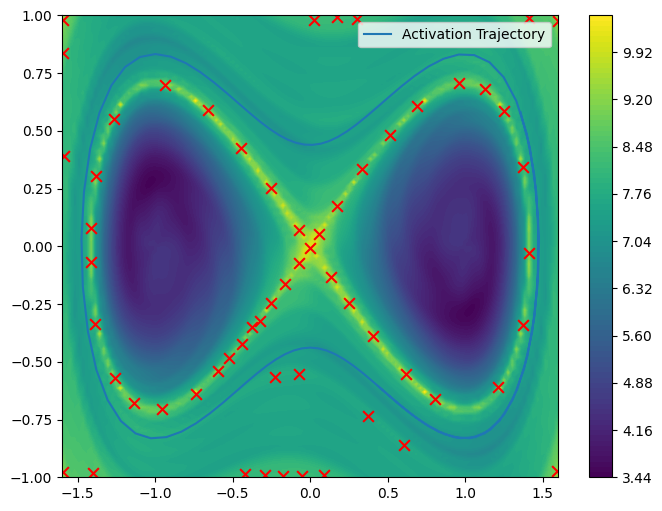

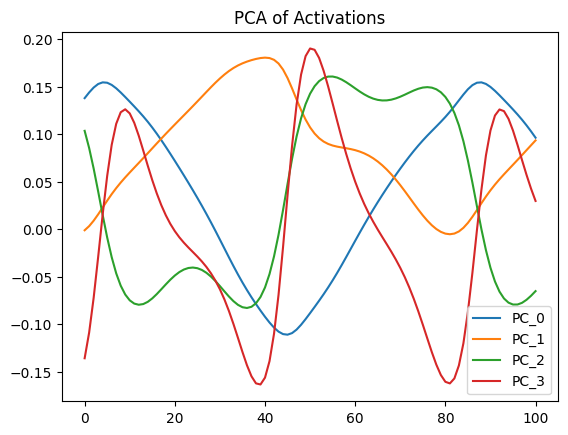

In [7]:
pts = get_point_array_from_grid(grid)
centroids ,_ = min_field_cluster(pts, duff_tse*-1, 60, eta=0.15, alpha=0.001, epochs=5)
plot_scalar_field(grid, duff_tse, show=False)
for (x,y) in centroids:
    plt.scatter(x,y, marker='x', s=60, c='r')

t = random.choice(duff_trajs)
t = t[:, ::(t.shape[-1]//100)]
plt.plot(t[0], t[1], label='Activation Trajectory')
plt.legend()
plt.show()

# compute distance
dist = scipy.spatial.distance.cdist(centroids, np.swapaxes(t,0,1))
soft_dist = scipy.special.softmax(dist, axis=0)

# do pca
pca = PCA(n_components=4)
pca.fit(soft_dist)

# plot pca
for i, pc in enumerate(pca.components_):
    plt.plot(pc, label=f'PC_{i}')
plt.legend()
plt.title("PCA of Activations")
plt.show()

In [110]:
N = 120
grid = DavisSkodje_grid(N)
[(x_min, x_max, Nx), (y_min, y_max, Ny)] = grid
t_n = 6
ds_trajs, sol = integrate_ivp(DavisSkodje, grid, t_n, max_step=0.01, return_sol=True)
time = sol.t
m = len(time)  // 2
dt = time[m]- time[m-1]
ds_tse = mean_tse(ds_trajs, dt)


In [111]:
from IPython.display import HTML

sub_t = ds_trajs[np.random.choice(ds_trajs.shape[0], 30, replace=False)]
sub_t = np.swapaxes(sub_t, 0, -1)
sub_t = np.swapaxes(sub_t, 1, -1)
sub_t = sub_t[::12]

def plotter(d):
    plot_scalar_field(grid, ds_tse, show=False, colorbar=False)
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])
    for (x,y) in d:
        plt.scatter(x, y, marker='o', s=60, c='r')

ani = make_plt_ani(plotter, sub_t)

HTML(ani.to_jshtml())


In [5]:
N = 50
grid = [(0, 2, N), (0, 2, N)]
pts = get_point_array_from_grid(grid)
x, y =  pts[:, 0],  pts[:, 1]
z = np.abs(y - x**(2/3))**(2/3) + 0.5*(x**2+y**2)**(1/2)


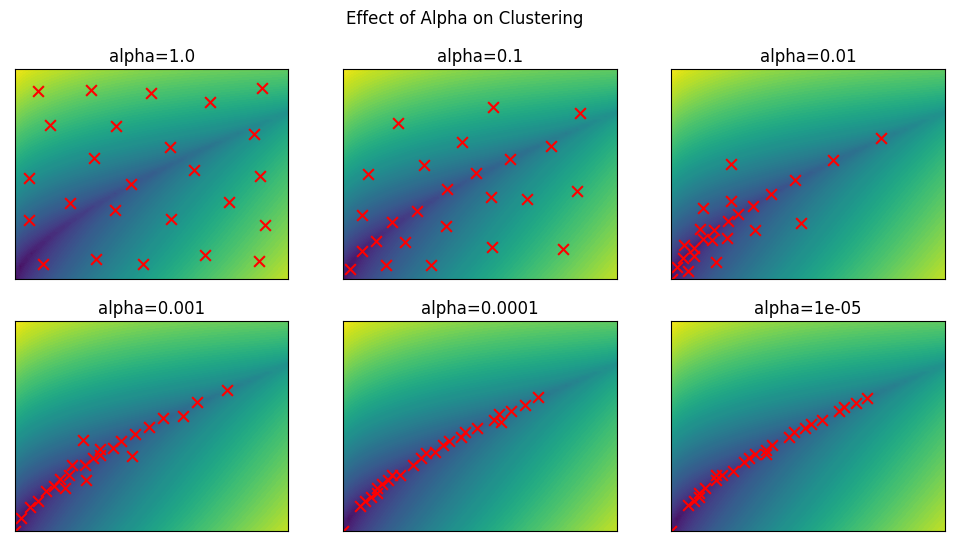

In [209]:

fig, axes = plt.subplots(2,3)
axes = axes.flat
for i, alpha in enumerate([1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]):
    ax = axes[i]
    position, slowness = min_field_cluster(pts, z, 25, eta=0.2, alpha=alpha, epochs=30)

    ax.set_xticks([])
    ax.set_yticks([])
    # field
    ax1 = np.linspace(*grid[0])
    ax2 = np.linspace(*grid[1])
    zz = z.reshape(grid[0][-1], grid[1][-1])
    ax.contourf(ax1, ax2, zz, cmap='viridis', levels=100)

    for (x,y) in position:
        ax.scatter(x, y, marker='x', s=60, c='r')
    ax.set_title(f'alpha={alpha}')

fig.set_size_inches(12,6)
plt.suptitle('Effect of Alpha on Clustering')
plt.show()



In [219]:
ani.save("clustering.gif", writer='imagemagick',fps=60)

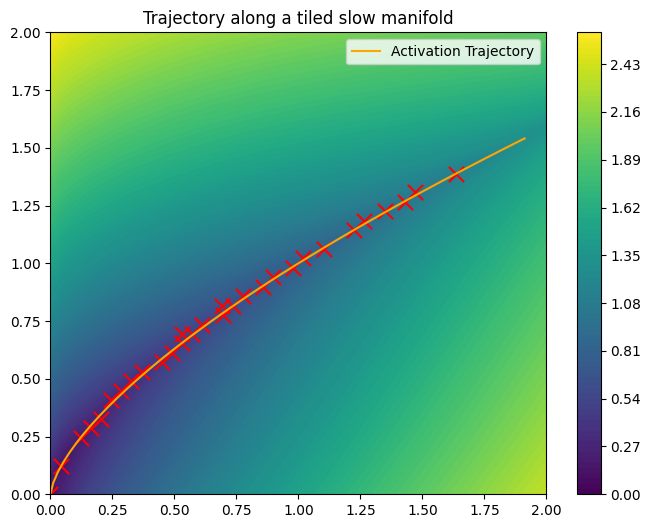

In [7]:
# make trajectory along slow manifold and cluster
plot_scalar_field(grid, z, show=False)

# traverse slow manifold, equispaced in x
x_ld = np.linspace(0,2,100)
y_ld = x_ld**(2/3)
# or get equispaced points on curve
x_ld = [0.0,0.0107438,0.0293192,0.052136,0.0779008,0.105893,0.135649,0.166848,0.199255,0.232694,0.267024,0.302135,0.337937,0.374355,0.411327,0.448801,0.48673,0.525076,0.563805,0.602888,0.642298,0.682011,0.722008,0.762269,0.802779,0.843521,0.884483,0.925652,0.967016,1.00857,1.05029,1.09218,1.13423,1.17644,1.21878,1.26127,1.30388,1.34663,1.38949,1.43247,1.47556,1.51876,1.56207,1.60547,1.64897,1.69256,1.73624,1.78001,1.82386,1.86779,1.9118]
x_ld = np.array(x_ld)
y_ld = x_ld**(2/3)

ld_pts = np.swapaxes(np.vstack([x_ld, y_ld]),0,1)
plt.plot(x_ld, y_ld, c='orange', label="Activation Trajectory")
centroids, _ = min_field_cluster(pts, z, 30, eta=0.5, alpha=1e-5, epochs=50)
for (x,y) in centroids:
    plt.scatter(x,y, marker='x', s=120, c='r')
plt.legend()
plt.title('Trajectory along a tiled slow manifold')
plt.show()

In [ ]:
# make trajectory along slow manifold and cluster
plot_scalar_field(grid, z, show=False)

# traverse slow manifold, equispaced in x
x_ld = np.linspace(0,2,100)
y_ld = x_ld/(1+x_ld)


ld_pts = np.swapaxes(np.vstack([x_ld, y_ld]),0,1)
plt.plot(x_ld, y_ld, c='orange', label="Activation Trajectory")
centroids, _ = min_field_cluster(pts, z, 30, eta=0.5, alpha=1e-5, epochs=50)
for (x,y) in centroids:
    plt.scatter(x,y, marker='x', s=120, c='r')
plt.legend()
plt.title('Trajectory along a tiled slow manifold')
plt.show()

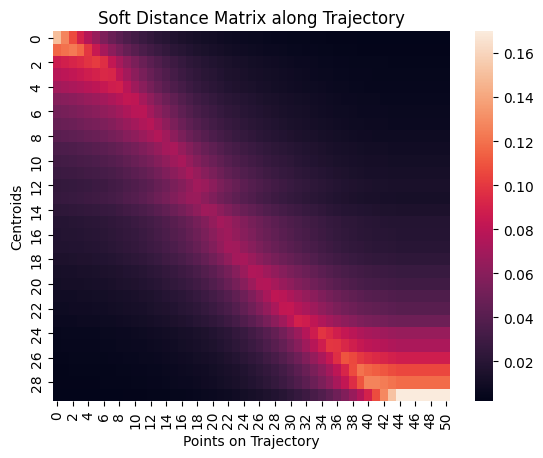

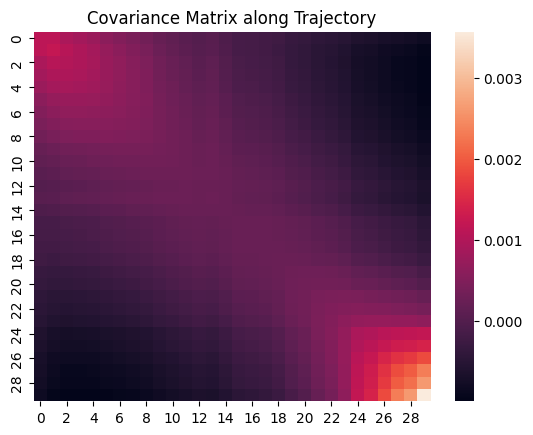

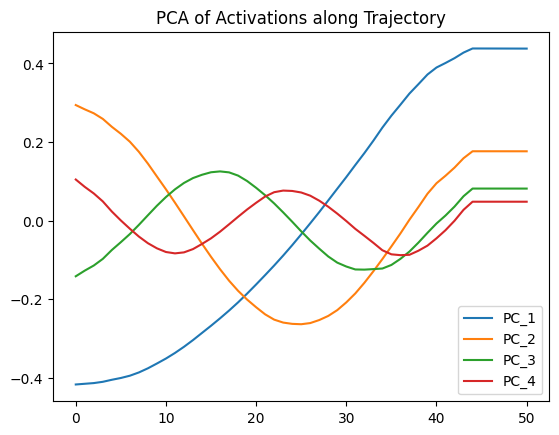

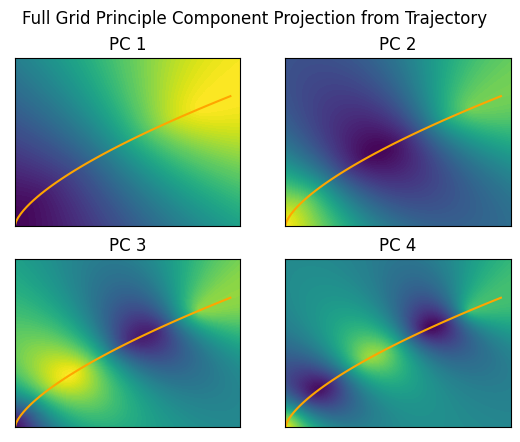

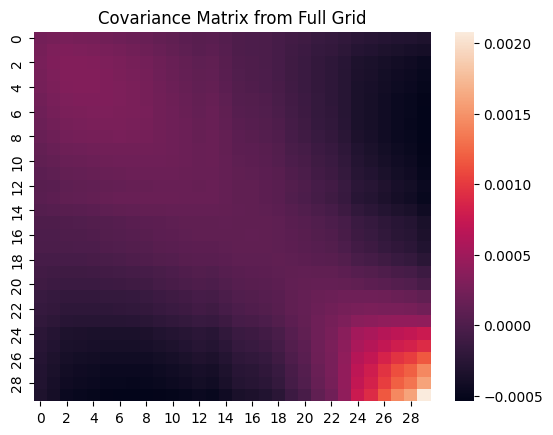

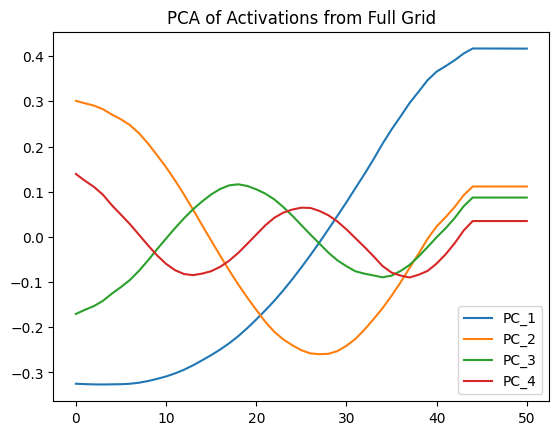

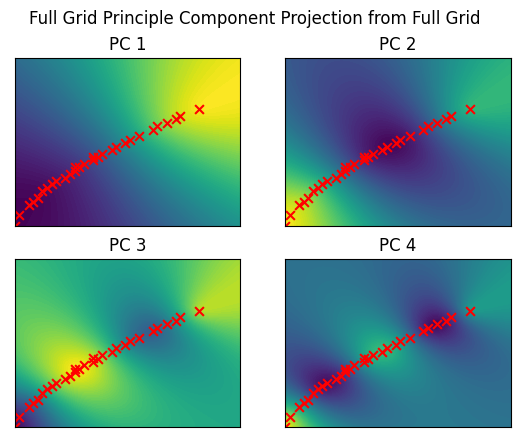

In [11]:
# compute activation from trajectory
soft_factor = 2
dist = scipy.spatial.distance.cdist(centroids, ld_pts)
soft_dist = scipy.special.softmax(dist*-1*soft_factor, axis=0)
s = np.argsort(np.argmax(soft_dist, axis=1))
soft_dist = soft_dist[s]

# also compute activation from full grid
pts = get_point_array_from_grid(grid)
dist_full = scipy.spatial.distance.cdist(centroids, pts)
soft_dist_full = scipy.special.softmax(dist_full*-1*soft_factor, axis=0)
soft_dist_full = soft_dist_full[s]

sns.heatmap(soft_dist)
plt.title('Soft Distance Matrix along Trajectory')
plt.xlabel('Points on Trajectory')
plt.ylabel('Centroids')
plt.show()


# center and pca
soft_dist -= soft_dist.mean(axis=1, keepdims=True)
cov = soft_dist @ soft_dist.T
cov /= soft_dist.shape[1]
w, vr = scipy.linalg.eig(cov)
vr = vr[:, np.argsort(w)[::-1]]

# plot cov
sns.heatmap(cov)
plt.title('Covariance Matrix along Trajectory')
plt.show()
# plot pca compoents
num_c = 4 
for i in range(num_c):
    pc = vr[:, i]
    pc /= pc[-1]
    plt.plot(pc @ soft_dist, label=f'PC_{i+1}')
plt.legend()
plt.title("PCA of Activations along Trajectory")
plt.show()

# look at scalar field of top PCA projection
fig, axes = plt.subplots(2,2)
axes = axes.flat
for i in range(num_c):
    ax = axes[i]
    pc = vr[:, i]
    proj = (pc @ soft_dist_full)
    plot_scalar_field_ax(grid, proj, ax)
    ax.plot(x_ld, y_ld, c='orange', label="Activation Trajectory")
    ax.set_title(f'PC {i+1}')
    ax.set_xticks([])
    ax.set_yticks([])
plt.suptitle('Full Grid Principle Component Projection from Trajectory')
plt.show()

# center and pca
soft_dist_full -= soft_dist_full.mean(axis=1, keepdims=True)
cov_full = soft_dist_full @ soft_dist_full.T
cov_full /= soft_dist_full.shape[1]
w, vr = scipy.linalg.eig(cov_full)
vr = vr[:, np.argsort(w)[::-1]]

# plot cov
sns.heatmap(cov_full)
plt.title('Covariance Matrix from Full Grid')
plt.show()

# plot pca compoents
num_c = 4 
for i in range(num_c):
    pc = vr[:, i]
    pc /= pc[-1]
    plt.plot(pc @ soft_dist, label=f'PC_{i+1}') # project original soft_dist
plt.legend()
plt.title("PCA of Activations from Full Grid")
plt.show()


# look at scalar field of top PCA projection
fig, axes = plt.subplots(2,2)
axes = axes.flat
for i in range(num_c):
    ax = axes[i]
    pc = vr[:, i]
    proj = (pc @ soft_dist_full)
    plot_scalar_field_ax(grid, proj, ax)
    for (x,y) in centroids:
        ax.scatter(x,y, marker='x', s=30, c='r')
    ax.set_title(f'PC {i+1}')
    ax.set_xticks([])
    ax.set_yticks([])
plt.suptitle('Full Grid Principle Component Projection from Full Grid')
plt.show()

